<a href="https://colab.research.google.com/github/DRA0R/Tensorflow_learing/blob/main/fashin_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U tensorflow_datasets

     |████████████████████████████████| 4.2 MB 5.2 MB/s 
  Attempting uninstall: tensorflow-datasets
    Found existing installation: tensorflow-datasets 4.0.1
    Uninstalling tensorflow-datasets-4.0.1:
      Successfully uninstalled tensorflow-datasets-4.0.1


In [2]:
import tensorflow as tf
import tensorflow_datasets as tfds
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

#Some helper libraries
import math
import numpy as np
import matplotlib.pyplot as plt

#progress bar display
import tqdm
import tqdm.auto

print(tf.__version__)

2.8.0


In [3]:
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/60000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteMMO7P6/fashion_mnist-train.tfrecord*...:   0…

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteMMO7P6/fashion_mnist-test.tfrecord*...:   0%…

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boor']

In [5]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples

In [6]:
lista =[num_test_examples, num_train_examples]
names=['test_examples', 'train_examples']
for i,c in enumerate(lista):
  print('number of {} examples: {}'.format(names[i], c))

number of test_examples examples: 10000
number of train_examples examples: 60000


In [7]:
def normalize(images, labels):
  iamges = tf.cast(images, tf.float32)
  images /= 255
  return iamges, labels

train_dataset = train_dataset.map(normalize)
test_dataset = test_dataset.map(normalize)

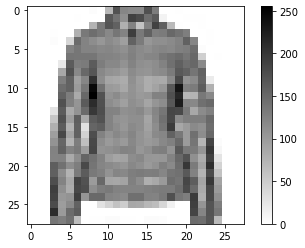

In [8]:
for image, label in test_dataset.take(1):
  break
image = image.numpy().reshape((28, 28))

plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

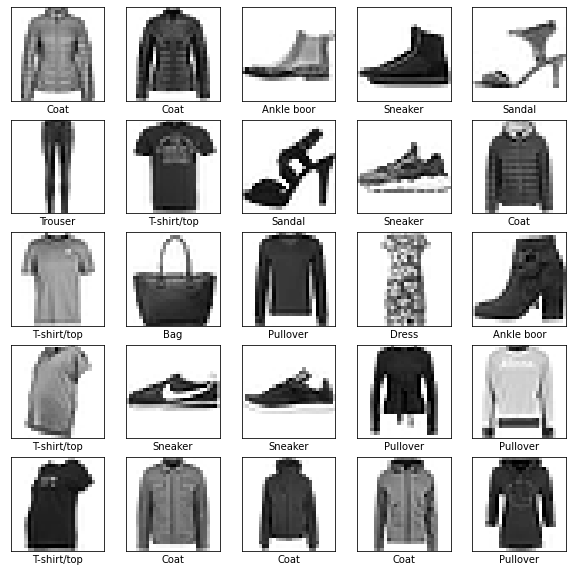

In [9]:
plt.figure(figsize= (10, 10))
i=0
for (image, label) in test_dataset.take(25):
  image = image.numpy().reshape((28,28))
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image, cmap= plt.cm.binary)
  plt.xlabel(class_names[label])
  i+=1
plt.show()

In [10]:
model = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
                             tf.keras.layers.Dense(128, activation=tf.nn.relu),
                             tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [11]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics= ['accuracy'])

In [12]:
BATCH_SIZE =32
train_dataset = train_dataset.repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

In [13]:
model.fit(train_dataset, epochs= 5, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Epoch 1/5
1875/1875 [==============================] - 17s 5ms/step - loss: 3.6263 - accuracy: 0.6821
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.7593 - accuracy: 0.7076
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6654 - accuracy: 0.7329
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6045 - accuracy: 0.7614
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5716 - accuracy: 0.7854


In [14]:
for test_images, test_labels in test_dataset.take(1):
  test_images - test_images.numpy()
  test_labels = test_labels.numpy()
  predictions = model.predict(test_images)

In [15]:
predictions.shape

(32, 10)

In [20]:
predictions[0]

array([3.3963577e-05, 4.6440755e-06, 1.4035602e-01, 1.1534870e-05,
       5.6685841e-01, 1.5581129e-05, 2.9271907e-01, 7.1856346e-16,
       7.3051206e-07, 2.4609942e-17], dtype=float32)

In [18]:
np.argmax(predictions[0])

4

In [21]:
test_labels[0]

4